# Pytorch Workflow fundamentals

- The essence of machine learning and deep learning is to take some data from the past, build an algorithm (like a neural network) to discover patterns in it and use the discovered patterns to predict the future.

In [43]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import seaborn as sns

print(torch.__version__)

What_this_module_covering = {
    1: "data (preparing data)",
    2: "building model ",
    3: "fitting the model to data",
    4: "making prediction and evaluating the model",
    5: "saving and loading the model",
    6: "putting it all together"
}
What_this_module_covering

2.4.1+cu121


{1: 'data (preparing data)',
 2: 'building model ',
 3: 'fitting the model to data',
 4: 'making prediction and evaluating the model',
 5: 'saving and loading the model',
 6: 'putting it all together'}

***

## 1. Data (preparing and loading)

Data in machine learning can be almost anything you can imagine: 

- *A table of number (Excel, Csv, ...)*

- *image of any kind, videos (Youtube has lots of data)*

- *audio like file songs or podcast*

- *protein structure*

- *text, content,..*

**Machine learning is a game of two parts:**

- *Turn your data, whatever it is, into numbers (a representation).*

- *Pick or build a model to learn the representation as best as possible.*



In [44]:
# Creating some data, a straight line
# Creating known parameter
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], "^", y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 '^',
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### *Spit data into training and test sets*

- *We've got some data*
- *But before we build a model we need to split it up*
- *One of the most important step in machine learning project is creating a training and test set(And when required, a validation set)*



In [45]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], X[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

### *Visualize the dataset in line by a plot_function*

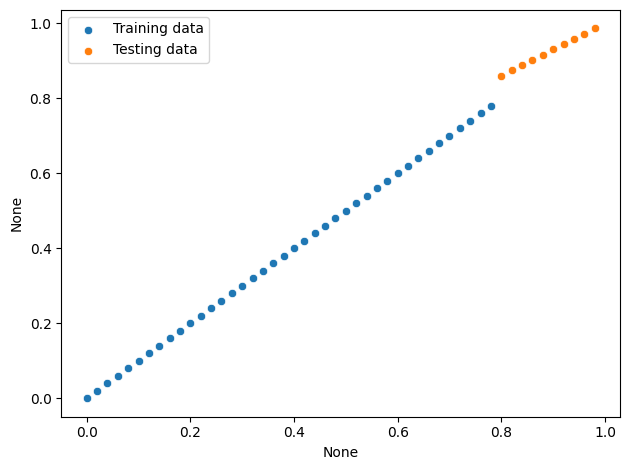

In [46]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None) -> None:

    sns.scatterplot(x=train_data.flatten(),
                    y=train_labels.flatten(), 
                    label="Training data")    
    
    sns.scatterplot(x=test_data.flatten(), 
                    y=test_labels.flatten(), 
                    label="Testing data")

    if predictions is not None:
        sns.scatterplot(x=test_data.flatten(), 
                        y=predictions.flatten(),
                        label="Predictions")

    plt.legend()
    plt.tight_layout()
    plt.show()


plot_predictions(X_train, y_train, X_test, y_test)

***

## 2. Build Model

- *Now we've got some data, let's build a model to use the blue dots to predict the test set*

- *Let's replicate a standard linear regression model using pure PyTorch*

**Four essential modules you can use to create almost any kind of neural network you can imagine**

        torch.nn            : Contains all of the building blocks for computational graphs
        torch.nn.Parameter  : Stores tensors that can be used with nn.Module.
        torch.nn.Module     : The base class for all neural network modules, all the building blocks for neural networks are subclasses
        torch.optim         : Contains various optimization algorithms
        def forward()       : All nn.Module subclasses required a forward() method


***Note:*** 

- *The optimization algorithms tells the model parameters stored in **nn.Parameter** how to best change to improve gradient descent and in turn reduce the loss*
- *The forward method defines the forward computation that will take place on the data passed to the particular **nn.Module** (the linear regression formula above)*
- *Almost everything in a PyTorch neural network comes from **torch.nn***

<img src="image_ref/pytorch_module.png" style="width:1000px">


In [47]:
class LinearRegressionModel(nn.Module):                                 # Create a Linear Regression model class
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1,                      # -> start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float32),   # -> PyTorch loves float32 bby default
                                                requires_grad=True)     # -> can we update this values with gradient descent?
        
        self.bias = nn.Parameter(torch.randn(1,                         # -> set the bias as the random num(this params will get adjusted during model training)
                                             dtype=torch.float32),      # -> Have no clue about it, but anyway it's a default
                                             requires_grad=True)        # -> Set this params as True mean this value can be update with gradient descent?       
        
    def forward(self, X:torch.Tensor) -> torch.Tensor:                  # -> "X" is the input data (e.g training/testing features)
        return self.weights * X + self.bias                             # -> This is the linear regression formula (y = m*x + b)

### *Checking the PyTorch model pre-define above*

- Set the manual_seed since nn.Parameter are randomly initialized
- Create an instance of the model (this is the subclass of nn.Module that contains nn.Parameter(s))
- Check the nn.Parameters() we just created

In [48]:
torch.manual_seed(15)

model_linear = LinearRegressionModel()

list(model_linear.parameters())

[Parameter containing:
 tensor([-0.7056], requires_grad=True),
 Parameter containing:
 tensor([0.6741], requires_grad=True)]

### *Another way to check the model hyper-params*

In [49]:
model_linear.state_dict()

OrderedDict([('weights', tensor([-0.7056])), ('bias', tensor([0.6741]))])

### *Making prediction using inferences_mode*

- We can check how closely it predict the **y_test** by passing the **X_test** into the inference mode
- When we pass data to our model, it'll go through the model's **forward()** method and produce a result using the computation we've defined

In [50]:
with torch.inference_mode():        # -> Enter inference mode: using when we need model make predictions
    y_preds = model_linear(X_test)       # -> make predictions with model

y_preds                             # -> check the prediction



## Note : in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#     y_preds = model_linear(X_test)
    

tensor([[ 0.1096],
        [ 0.0955],
        [ 0.0814],
        [ 0.0673],
        [ 0.0532],
        [ 0.0390],
        [ 0.0249],
        [ 0.0108],
        [-0.0033],
        [-0.0174]])

### Check the predictions

- *Those predictions look pretty bad..*
- *This make sense through, when you remember our model is just using random parameter values to make prediction*
- *It hasn't even looked at the train dots to try to predict the test dots*
- *Time to change that*

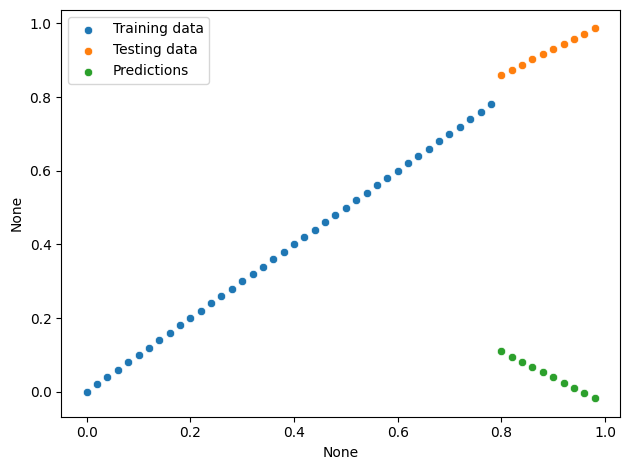

In [51]:
plot_predictions(predictions=y_preds)

In [52]:
y_test - y_preds

tensor([[0.7504],
        [0.7785],
        [0.8066],
        [0.8347],
        [0.8628],
        [0.8910],
        [0.9191],
        [0.9472],
        [0.9753],
        [1.0034]])

***

## 3. Train Model

**Currently**

- The model is just using the random parameter to make calculations, It's basically guessing randomly

**Solution**
- *To fix that we can update its internal parameters( I also refer to parameters as patterns),  the weights and bias values was set randomly to something better represents the data*

- *Much of the time we won't know what the ideal parameters are for the model*

- *Instead, it's much more fun to write code to see if the model can try and figure them out itself*

### *Creating a loss function and optimizer in PyTorch*

- *For our model to update its parameters on its own, we'll need to add a few more things to our recipe*

        Loss function and Optimizer

**Roles of these two are**

- **Loss function :**   *Measure how wrong your model's predictions are compare to the truth labels* E.g. MAE, MSE, RMSE..
- **Optimizer     :**   *Tells your model how to update its internal parameters to best*             E.g. Stochastic Gradient Decent, Adam


In [ ]:
# Create loss function
loss_fn = torch.nn.L1Loss()                                     # -> MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_linear.parameters(),   # -> parameters of target model to optimize
                            lr=0.01)                            # -> learning rate (how much the optimizer should change parameters at each step)
                                                                    #higher = more (less stable) 
                                                                    #Lower  = less (might take a long time)



### *Creating optimization loop in PyTorch*

- *Now we have loss function and optimizer, It's time to create a **Training_loop** and **Testing_loop***

**The training loop** *involves the model going through the training data and learning the relationships between the Features and Labels*

**The testing loop** *involves going through the testing data and evaluating how good the patterns are model learned on training data*

***Note:***
- Each of these is called a "loop" because we want our model to look (loop through) at each example in each dataset

In [71]:
torch.manual_seed(16)

epochs = 1000                                                # -> Set the number of epochs (how many time the model will pass over the training data)

train_loss_values = []                                      # -> Creating empty loss lists to track values
test_loss_values  = []
epoch_count       = []

for epoch in range(epochs):                                 # -> Training loop

    ### Training
    model_linear.train()                                    # -> Put the model in training mode (This is a default state of the model)

    y_preds = model_linear(X_train)                         # 1. forward pass on training data using forward() method inside

    loss = loss_fn(y_preds, y_train)                        # 2. Calculate the loss (how differences are our models predictions to the ground truth)

    optimizer.zero_grad()                                   # 3. Zero_grad of the optimizer

    loss.backward()                                         # 4. Loss backward

    optimizer.step()                                        # 5. Progress the optimizer

    ### Testing 
    model_linear.eval()                                             # -> Put the model in evaluation mode

    with torch.inference_mode():                                    # 0. Enter the inference mode

        test_pred = model_linear(X_test)                            # 1. Forward pass on test data

        test_loss = loss_fn(test_pred, y_test.type(torch.float32))  # 2. Calculated the loss on test data

        if epoch % 10 == 0:                                         # -> Print out what's happening

            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            
            print(f"Epoch: {epoch} | MAE train loss: {loss} | MAE test loss {test_loss}")



Epoch: 0 | MAE train loss: 0.007215976715087891 | MAE test loss 0.03166043013334274
Epoch: 10 | MAE train loss: 0.007215976715087891 | MAE test loss 0.03166043013334274
Epoch: 20 | MAE train loss: 0.007215976715087891 | MAE test loss 0.03166043013334274
Epoch: 30 | MAE train loss: 0.007215976715087891 | MAE test loss 0.03166043013334274
Epoch: 40 | MAE train loss: 0.007215976715087891 | MAE test loss 0.03166043013334274
Epoch: 50 | MAE train loss: 0.007215976715087891 | MAE test loss 0.03166043013334274
Epoch: 60 | MAE train loss: 0.007215976715087891 | MAE test loss 0.03166043013334274
Epoch: 70 | MAE train loss: 0.007215976715087891 | MAE test loss 0.03166043013334274
Epoch: 80 | MAE train loss: 0.007215976715087891 | MAE test loss 0.03166043013334274
Epoch: 90 | MAE train loss: 0.007215976715087891 | MAE test loss 0.03166043013334274
Epoch: 100 | MAE train loss: 0.007215976715087891 | MAE test loss 0.03166043013334274
Epoch: 110 | MAE train loss: 0.007215976715087891 | MAE test loss

### *Plot the loss curves*

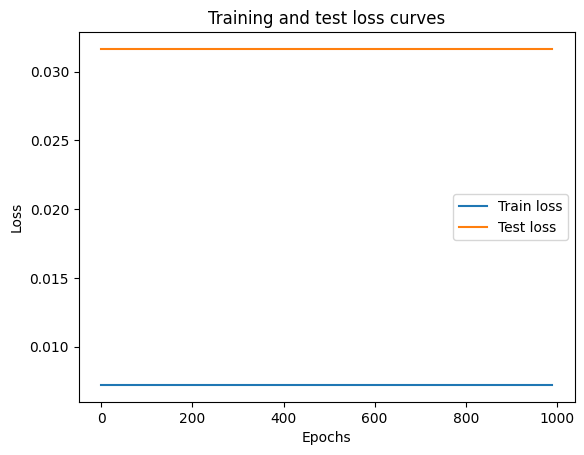

In [72]:
plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

**Remember:**

- *Loss* is the measure of how wrong your model is, so the lower it is better it generalize to data

In [56]:
model_linear.state_dict()

OrderedDict([('weights', tensor([0.1636])), ('bias', tensor([0.3511]))])

## 4. Inferences

*Once you've trained a model, you'll likely want to make predictions with it*

*There are three things to remember when making predictions ( also called performing inferences_mode():...)*

        1. Set the model in evaluation mode                                     => model.eval()
        2. Make the predictions using the inferences mode context manager       => with torch.inference_mode():
        3. All predictions should be made with objects on the same device


In [74]:
model_linear.eval()                      # -> Enter evaluation mode

with torch.inference_mode():             # -> Enter the inference mode for predicting, testing

    y_preds = model_linear(X_test)

y_preds
    

tensor([[0.7888],
        [0.8086],
        [0.8284],
        [0.8482],
        [0.8680],
        [0.8878],
        [0.9076],
        [0.9274],
        [0.9472],
        [0.9670]])

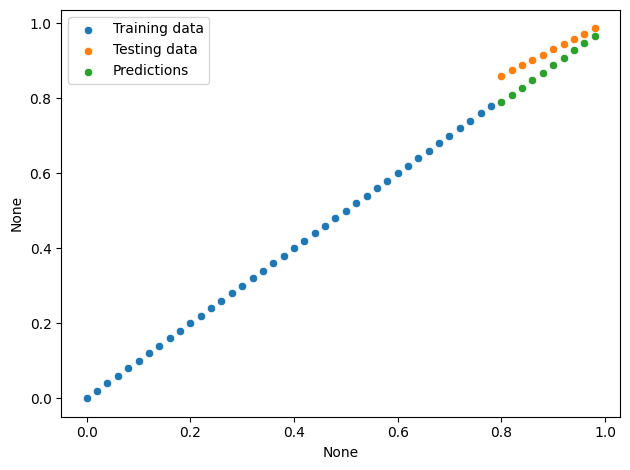

In [75]:
plot_predictions(predictions=y_preds)

## 5. Saving and loading  a PyTorch Model

*If you trained a PyTorch model, chances are you'll want to save it and export it  somewhere*

        torch.save()
        torch.load()

In [59]:
from pathlib import Path


Model_path = Path("models")                         # -> Create model directory
Model_path.mkdir(parents=True, exist_ok=True)

Model_name = "notebook.pth"
Model_save_path = Model_path / Model_name

print(f"Saving model to: {Model_save_path}")
torch.save(obj=model_linear.state_dict(),
           f=Model_save_path) 




Saving model to: models/notebook.pth


In [60]:
!ls -l models/notebook.pth

-rw-rw-r-- 1 lovecrush lovecrush 1502 Nov 12 22:23 models/notebook.pth


## Loading a saves  MyTorch models a state_dict()

### *Loading model*

In [76]:

loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=Model_save_path))



/tmp/ipykernel_5648/2271046517.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=Model_save_path))


<All keys matched successfully>

### *Inferences*


In [62]:
loaded_model.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

In [63]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])